In [1]:
# from tensorflow.keras.preprocessing import image_dataset_from_directory

ImportError: cannot import name 'image_dataset_from_directory' from 'tensorflow.keras.preprocessing' (C:\Users\lemon\anaconda3\envs\project-env\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\preprocessing\__init__.py)

In [47]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11361180427755505112
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4881035264
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3671860103084622087
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [44]:
tf.test.is_gpu_available()

True

In [42]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import glob
import os
from tqdm import tqdm
import time
from PIL import Image, ImageEnhance, ImageChops
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LeakyReLU


In [4]:
from importlib import reload

In [5]:
np.random.seed(0)
tf.random.set_seed(0)

In [6]:
b_size=5

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.5,
                                   zoom_range=0.5,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
train_generator = train_datagen.flow_from_directory('D:/original_image/train/',target_size=(240,240),
                                                    batch_size=b_size, class_mode='categorical')

Found 4800 images belonging to 8 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory('D:/original_image/val/',target_size=(240,240),
                                                    batch_size=b_size, class_mode='categorical')

Found 2000 images belonging to 8 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('D:/original_image/test/',target_size=(240,240),
                                                    batch_size=b_size, class_mode='categorical')

Found 1200 images belonging to 8 classes.


In [11]:
test_generator.class_indices

{'63building': 0,
 'castle': 1,
 'general': 2,
 'indep_door': 3,
 'judgement_castle': 4,
 'lotte_tower': 5,
 'namsan': 6,
 'tapgol_park': 7}

In [20]:
model = Sequential()
model.add(Conv2D(20, (3, 3), input_shape=(240,240,3)))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(40, (3, 3)))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 238, 238, 20)      560       
_________________________________________________________________
activation_5 (Activation)    (None, 238, 238, 20)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 119, 119, 20)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 117, 117, 20)      3620      
_________________________________________________________________
activation_6 (Activation)    (None, 117, 117, 20)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 58, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 40)       

In [22]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),\
              metrics=['accuracy'])

In [23]:
steps_train = len(train_generator)
steps_validation = len(validation_generator)
setps_test = len(test_generator)

In [16]:
steps_train

960

In [17]:
setps_test

240

In [18]:
steps_validation

400

In [24]:
history = model.fit_generator(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=validation_generator,
       validation_steps=steps_validation )

Epoch 1/20
960/960 [==============================] - 72s 75ms/step - loss: 1.2703 - accuracy: 0.5460 - val_loss: 0.4703 - val_accuracy: 0.8905
Epoch 2/20
960/960 [==============================] - 65s 68ms/step - loss: 0.8286 - accuracy: 0.7173 - val_loss: 0.2775 - val_accuracy: 0.9205
Epoch 3/20
960/960 [==============================] - 66s 69ms/step - loss: 0.6786 - accuracy: 0.7796 - val_loss: 0.2201 - val_accuracy: 0.9465
Epoch 4/20
960/960 [==============================] - 68s 71ms/step - loss: 0.5900 - accuracy: 0.8117 - val_loss: 0.1518 - val_accuracy: 0.9565
Epoch 5/20
960/960 [==============================] - 66s 68ms/step - loss: 0.5329 - accuracy: 0.8373 - val_loss: 0.1261 - val_accuracy: 0.9650
Epoch 6/20
960/960 [==============================] - 67s 69ms/step - loss: 0.4721 - accuracy: 0.8467 - val_loss: 0.1134 - val_accuracy: 0.9650
Epoch 7/20
960/960 [==============================] - 66s 69ms/step - loss: 0.4535 - accuracy: 0.8496 - val_loss: 0.1168 - val_accuracy:

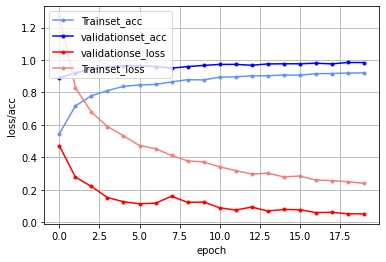

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='cornflowerblue', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='blue', label='validationset_acc')
plt.plot(x_len, y_vloss, marker='.', c='red', label='validationse_loss')
plt.plot(x_len, y_loss, marker='.', c='lightcoral', label='Trainset_loss')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [48]:

model.save('model/jinsu_model.h5')


ImportError: `save_model` requires h5py.

In [22]:
# model.save('model/jinsu_model')

In [31]:
output = model.predict(test_generator, steps=setps_test)
test_generator.class_indices



{'63building': 0,
 'castle': 1,
 'general': 2,
 'indep_door': 3,
 'judgement_castle': 4,
 'lotte_tower': 5,
 'namsan': 6,
 'tapgol_park': 7}

In [32]:
output

array([[5.3806855e-07, 4.1020851e-07, 2.3435832e-05, ..., 3.4992226e-07,
        1.8986916e-07, 9.9997139e-01],
       [2.3924133e-12, 2.5085010e-15, 5.6045543e-11, ..., 2.2417691e-13,
        9.7611554e-17, 5.6359853e-22],
       [3.1635704e-04, 2.4758975e-12, 2.6116391e-05, ..., 4.2487791e-10,
        2.1676966e-11, 2.7325245e-07],
       ...,
       [5.2720583e-07, 1.1839562e-06, 6.8392901e-04, ..., 2.2404101e-06,
        7.8526746e-06, 9.9930251e-01],
       [3.9101590e-04, 1.1159242e-08, 9.9885559e-01, ..., 3.6567534e-04,
        2.8013301e-04, 1.2820574e-07],
       [1.0000000e+00, 5.4124251e-16, 1.1341151e-11, ..., 8.3025803e-10,
        1.3017657e-11, 1.7371412e-14]], dtype=float32)

In [33]:
loss, acc = model.evaluate(test_generator)
acc

240/240 [==============================] - 3s 13ms/step - loss: 0.0794 - accuracy: 0.9783


0.97833335

In [26]:
# caltech_dir = "D:/deeplearning/mini_test"
# image_w = 300
# image_h = 300
# pixels = image_h * image_w * 3
# X = []
# filenames = []
# files = glob.glob(caltech_dir+"/*.*")
# for i, f in enumerate(files):
#     img = Image.open(f)
#     img = img.convert("RGB")
#     img = img.resize((image_w, image_h))
#     data = np.asarray(img)
#     filenames.append(f)
#     X.append(data)
# X = np.array(X)


In [27]:
# model = load_model('./model_sample.h5')
# prediction = model.predict(X)
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# cnt = 0
# #이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
# for i in prediction:
#     pre_ans = i.argmax()  # 예측 레이블
#     print(i)
#     print(pre_ans)
#     pre_ans_str = ''
#     if pre_ans == 0: pre_ans_str = "Geunjeongjeon_Hall"
#     elif pre_ans == 1: pre_ans_str = "Gyeonghoeru"
#     else: pre_ans_str = "없음"
#     if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
#     if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
#     cnt += 1
#     # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
#     # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
#     # 이걸 한 것은 _4.py에.